In [141]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # 최적 클러스터 점수

import phik # 범주형 변수 간 상관계수

In [142]:
catdata = pd.read_csv('../Data/LJH_catdata.csv' , usecols = ['occyp_type','income_total'])
train = pd.read_csv('../Data/LJH_catdata.csv' , index_col= 'Unnamed: 0')

In [143]:
catdata.isnull().sum()

income_total       0
occyp_type      8171
dtype: int64

In [144]:
catdata.shape

(26457, 2)

In [145]:
catdata.head(10)

,income_total,occyp_type
0,C,NaN
1,D,Laborers
2,D,Managers
3,C,Sales staff
4,B,Managers
5,D,High skill tech staff
6,D,Core staff
7,D,Drivers
8,C,NaN
9,A,Medicine staff


In [146]:
catdata['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [147]:
catdata['occyp_type'] = catdata['occyp_type'].fillna('Secret')

In [148]:
catdata['occyp_type'].value_counts()

Secret                   8171
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [149]:
subset = subset.drop('Secret', axis = 0)

In [150]:
subset = pd.crosstab(catdata['occyp_type'], catdata['income_total'])

In [151]:
subset = subset.div(subset.sum(axis=1), axis=0)

# **KMEANS 최선의 클러스터 결정**

0.556047
0.395112
0.434981
0.41051


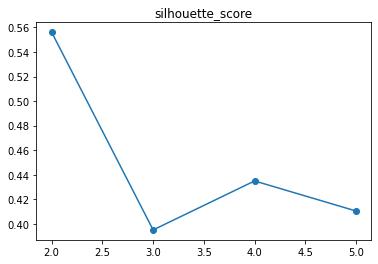

In [174]:
sil_score = []
for i in range(2, 6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(subset)
    sil_score.append(silhouette_score(subset, kmeans.labels_))
    print(round(silhouette_score(subset, kmeans.labels_),6))

index = [i for i in range(2,6)]

plt.plot(index, sil_score,  marker ='o')
plt.title('silhouette_score')
plt.show()

In [154]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(subset)

KMeans(n_clusters=3)

In [155]:
kmeans.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0])

In [156]:
catdata['occyp_type'] = catdata['occyp_type'].replace(['Realty agents', 'Managers'], 'A')
catdata['occyp_type'] = catdata['occyp_type'].replace(['Cleaning staff' ,'Cooking staff' ,'Low-skill Laborers' ,'Medicine staff' ,'Sales staff' ,'Secretaries' ,'Waiters/barmen staff'] , 'B')
catdata['occyp_type'] = catdata['occyp_type'].replace('Secret', 'C')
catdata['occyp_type'] = catdata['occyp_type'].replace(['Accountants', 'Core staff', 'Drivers', 'HR staff','High skill tech staff', 'IT staff', 'Laborers','Private service staff', 'Security staff'] , 'D')

# **phi 상관계수**

In [159]:
catdata.global_phik()

(array([[0.4026888],
        [0.4026888]]),
 array(['income_total', 'occyp_type'], dtype=object))

In [176]:
train[['income_total','occyp_type']].global_phik()

(array([[0.33005355],
        [0.33005355]]),
 array(['income_total', 'occyp_type'], dtype=object))